In [1]:
import pandas as pd 
df=pd.read_csv("avocado.csv")
df['Date']=pd.to_datetime(df['Date'])
my_target=df[ df['AveragePrice']>2] #Specific data point
my_target=my_target.set_index('Date')


FileNotFoundError: [Errno 2] No such file or directory: 'avocado.csv'

<AxesSubplot:xlabel='Date'>

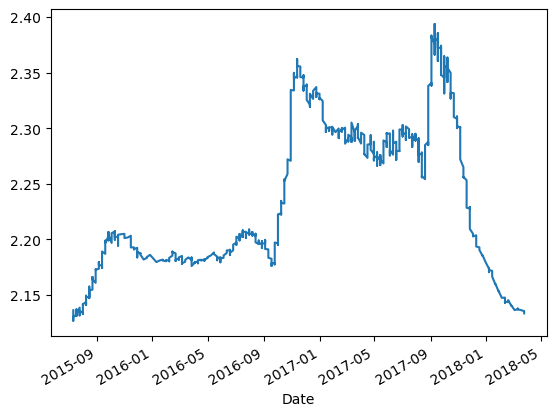

In [21]:
my_target.sort_index(inplace=True)
my_target['AveragePrice'].rolling(100).mean().plot()

In [22]:
my_target['AveragePricebelowthree']=my_target['AveragePrice'].rolling(700).mean()
my_target.dropna(inplace=True)
my_target.head(10)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricebelowthree
Date,,,,,,,,,,,,,,
2017-03-19,41,2.04,24796.80,604.48,17563.18,45.65,6583.49,6460.53,122.96,0.0,organic,2017,HartfordSpringfield,2.223857
2017-03-19,41,2.59,2427.94,1223.80,96.36,0.00,1107.78,1107.78,0.00,0.0,organic,2017,MiamiFtLauderdale,2.224686
2017-03-19,41,2.05,2395.16,27.77,1593.25,0.00,774.14,689.51,84.63,0.0,organic,2017,GrandRapids,2.224300
2017-03-19,41,2.46,5971.13,1795.34,3449.75,0.00,726.04,726.04,0.00,0.0,organic,2017,Sacramento,2.224771
2017-03-19,41,2.06,4382.20,1487.35,118.26,0.00,2776.59,1185.55,1591.04,0.0,organic,2017,Orlando,2.224443
2017-03-19,41,2.06,18537.54,1109.47,7239.15,227.38,9961.54,9943.79,17.75,0.0,organic,2017,BaltimoreWashington,2.224129
2017-03-19,41,2.88,18687.22,6332.48,9140.83,11.70,3202.21,3202.21,0.00,0.0,organic,2017,SanFrancisco,2.225300
2017-03-26,40,2.48,13053.93,173.46,6545.48,0.00,6334.99,6005.87,329.12,0.0,organic,2017,HartfordSpringfield,2.225943
2017-03-26,40,2.12,2614.15,0.00,137.60,0.00,2476.55,753.67,1722.88,0.0,organic,2017,Syracuse,2.226000


# Creating Many clumuns for each list that we have created by manipuplation 

In [48]:

import pandas as pd 
df=pd.read_csv("avocado.csv")
df=df.copy()[df['type']=='organic']
df['Date']=pd.to_datetime(df['Date'])
df.sort_values(by='Date',ascending=True,inplace=True)

x=df['region'].unique()
graph_df=pd.DataFrame()
for region in x:
    region_df=df.copy()[df['region']==region]
    region_df.set_index('Date',inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_Newprice']=region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df=region_df[[f'{region}_Newprice']]
    else:
        graph_df=graph_df.join(region_df[f'{region}_Newprice'])
    

    


In [49]:
graph_df.dropna()


,California_Newprice,LasVegas_Newprice,PhoenixTucson_Newprice,BuffaloRochester_Newprice,Spokane_Newprice,LosAngeles_Newprice,Philadelphia_Newprice,Boston_Newprice,StLouis_Newprice,Louisville_Newprice,...,Houston_Newprice,Chicago_Newprice,Plains_Newprice,Indianapolis_Newprice,SouthCentral_Newprice,Columbus_Newprice,Albany_Newprice,Detroit_Newprice,NewOrleansMobile_Newprice,NewYork_Newprice
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,1.24,1.50,1.12,1.73,1.30,1.25,1.72,1.83,1.80,1.48,...,1.22,1.49,1.69,1.63,1.35,1.44,1.79,1.70,1.41,1.93
2015-01-11,1.10,1.54,1.36,1.59,1.38,1.08,1.63,1.94,1.84,1.79,...,1.26,1.79,1.68,1.83,1.39,1.68,1.77,1.87,1.44,2.03
2015-01-18,1.24,1.63,1.36,1.64,1.44,1.29,1.93,2.00,1.92,1.79,...,1.20,1.81,1.80,1.96,1.27,1.84,1.93,1.90,0.98,2.08
2015-01-25,1.30,1.66,1.54,1.60,1.66,1.23,1.82,2.01,1.93,1.68,...,1.24,1.83,1.80,1.78,1.37,1.67,1.89,1.62,1.47,2.02
2015-02-01,1.11,1.60,1.18,1.55,1.38,1.12,1.69,1.78,1.93,1.55,...,1.15,1.52,1.67,1.69,1.28,1.63,1.83,1.55,1.48,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.82,1.66,1.60,1.27,1.64,1.74,1.56,1.79,1.69,1.59,...,1.41,1.68,1.57,1.45,1.41,1.57,1.56,1.45,1.35,1.72
2018-03-04,1.57,1.66,1.69,1.38,1.60,1.40,1.51,1.92,1.76,1.43,...,1.37,1.62,1.55,1.23,1.41,1.48,1.48,1.16,1.39,1.69
2018-03-11,1.58,1.62,1.62,1.24,1.72,1.39,1.72,1.85,1.71,1.35,...,1.26,1.66,1.55,1.22,1.32,1.26,1.68,1.23,1.36,1.92


<AxesSubplot:xlabel='Date'>

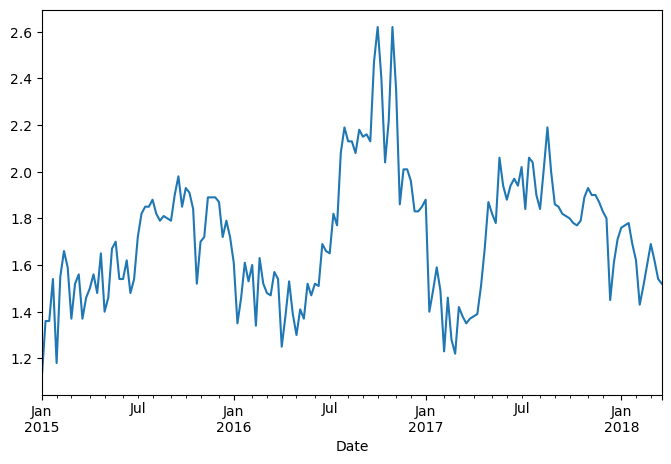

In [50]:
graph_df['PhoenixTucson_Newprice'].plot(figsize=(8,5),legend=False)

In [51]:
x

array(['California', 'LasVegas', 'PhoenixTucson', 'BuffaloRochester',
       'Spokane', 'LosAngeles', 'Philadelphia', 'Boston', 'StLouis',
       'Louisville', 'Orlando', 'Southeast', 'Boise', 'MiamiFtLauderdale',
       'NorthernNewEngland', 'BaltimoreWashington', 'Midsouth', 'Tampa',
       'West', 'Northeast', 'Atlanta', 'Nashville', 'TotalUS', 'Syracuse',
       'WestTexNewMexico', 'Jacksonville', 'Charlotte', 'Sacramento',
       'GrandRapids', 'Roanoke', 'Denver', 'SanDiego', 'GreatLakes',
       'RichmondNorfolk', 'DallasFtWorth', 'SanFrancisco',
       'HarrisburgScranton', 'Pittsburgh', 'RaleighGreensboro', 'Seattle',
       'HartfordSpringfield', 'Portland', 'CincinnatiDayton',
       'SouthCarolina', 'Houston', 'Chicago', 'Plains', 'Indianapolis',
       'SouthCentral', 'Columbus', 'Albany', 'Detroit',
       'NewOrleansMobile', 'NewYork'], dtype=object)